# Quick Start

> Note: If you're viewing this notebook on `nbviewer.jupyter.org` some of the SVGs render improperly, even across cell output contexts. The bug is not in `itikz`.

## Installation

### Install TeX and pdf2svg

This is platform-dependent. 

See:
    
- [Texlive](https://www.tug.org/texlive/)
- [pdf2svg](http://www.cityinthesky.co.uk/opensource/pdf2svg/)
- [Windows Instructions](InstallationSteps.png)

### Install itikz

```sh
pip install itikz
```

## Usage

Load itikz. It's a jupter extension.

In [1]:
%load_ext itikz

Create a simple standalone document.

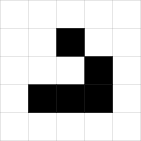

In [2]:
%%itikz
\documentclass[tikz]{standalone}
\begin{document}
\begin{tikzpicture}
\draw[help lines] grid (5, 5);
\draw[fill=black] (1, 1) rectangle (2, 2);
\draw[fill=black] (2, 1) rectangle (3, 2);
\draw[fill=black] (3, 1) rectangle (4, 2);
\draw[fill=black] (3, 2) rectangle (4, 3);
\draw[fill=black] (2, 3) rectangle (3, 4);
\end{tikzpicture}
\end{document}

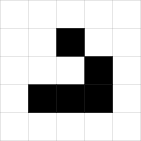

In [3]:
%%itikz
\documentclass[tikz]{standalone}
\begin{document}
\begin{tikzpicture}
\draw[help lines] grid (5, 5);
\draw[fill=black] (1, 1) rectangle (2, 2);
\draw[fill=black] (2, 1) rectangle (3, 2);
\draw[fill=black] (3, 1) rectangle (4, 2);
\draw[fill=black] (3, 2) rectangle (4, 3);
\draw[fill=black] (2, 3) rectangle (3, 4);
\end{tikzpicture}
\end{document}

The extension:
    
- Writes the cell as a `.tex` file; 
- Runs `pdflatex` on the source;
- Runs `pdf2svg` on the generated pdf;
- Removes the intermediary artifacts.

By default, the filenames are the `md5` hash of the source. The extension uses the hash to see if regeneration is necessessary. If it's not, it just loads the SVG file.

In [4]:
!ls *.svg *.tex

ls: cannot access '*.svg': No such file or directory
ls: cannot access '*.tex': No such file or directory


This is annoying sometimes if you want to look for a specific file outside of the notebook. So, you can prefix it, attaching semantical meaning.

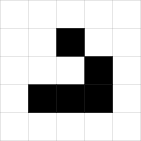

In [5]:
%%itikz --file-prefix conway-

\documentclass[tikz]{standalone}
\begin{document}
\begin{tikzpicture}
\draw[help lines] grid (5, 5);
\draw[fill=black] (1, 1) rectangle (2, 2);
\draw[fill=black] (2, 1) rectangle (3, 2);
\draw[fill=black] (3, 1) rectangle (4, 2);
\draw[fill=black] (3, 2) rectangle (4, 3);
\draw[fill=black] (2, 3) rectangle (3, 4);
\end{tikzpicture}
\end{document}

In [6]:
!ls *.svg *.tex

ls: cannot access '*.svg': No such file or directory
ls: cannot access '*.tex': No such file or directory


Of course, writing TikZ files entails lots of tiny tweaks, resulting in a lot of accumulated cruft. For development, you probably want to use your system temp directory to keep your project directory clean.

In [7]:
!rm -f *.svg *.tex

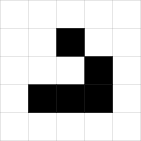

In [8]:
%%itikz --temp-dir --file-prefix conway-

\documentclass[tikz]{standalone}
\begin{document}
\begin{tikzpicture}
\draw[help lines] grid (5, 5);
\draw[fill=black] (1, 1) rectangle (2, 2);
\draw[fill=black] (2, 1) rectangle (3, 2);
\draw[fill=black] (3, 1) rectangle (4, 2);
\draw[fill=black] (3, 2) rectangle (4, 3);
\draw[fill=black] (2, 3) rectangle (3, 4);
\end{tikzpicture}
\end{document}

In [9]:
!ls *.svg *.tex

ls: cannot access '*.svg': No such file or directory
ls: cannot access '*.tex': No such file or directory


To make it easier to switch from development to production mode, setting the `ITIKZ_TEMP_DIR` environmental to any value enables `--temp-dir`.

In [10]:
import os
os.environ['ITIKZ_TEMP_DIR'] = 'C:/tmp'

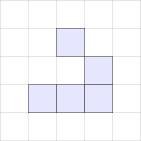

In [11]:
%%itikz --file-prefix conway- --keep-file "/tmp/itikz/foo"
\documentclass[tikz]{standalone}
\begin{document}
\begin{tikzpicture}
\draw[help lines] grid (5, 5);
\draw[fill=blue!10] (1, 1) rectangle (2, 2);
\draw[fill=blue!10] (2, 1) rectangle (3, 2);
\draw[fill=blue!10] (3, 1) rectangle (4, 2);
\draw[fill=blue!10] (3, 2) rectangle (4, 3);
\draw[fill=blue!10] (2, 3) rectangle (3, 4);
\end{tikzpicture}
\end{document}

In [12]:
!ls *.svg *.tex

ls: cannot access '*.svg': No such file or directory
ls: cannot access '*.tex': No such file or directory


In [13]:
del os.environ['ITIKZ_TEMP_DIR']

Sometimes, you want to generate a TikZ document from a string, rather than a cell. You can do that using the line magic.

In [14]:
conway_str = r"""\documentclass[tikz]{standalone}
\begin{document}
\begin{tikzpicture}
\draw[help lines] grid (5, 5);
\draw[fill=magenta] (1, 1) rectangle (2, 2);
\draw[fill=magenta] (2, 1) rectangle (3, 2);
\draw[fill=magenta] (3, 1) rectangle (4, 2);
\draw[fill=magenta] (3, 2) rectangle (4, 3);
\draw[fill=magenta] (2, 3) rectangle (3, 4);
\end{tikzpicture}
\end{document}"""

In [15]:
%itikz --temp-dir --file-prefix conway- conway_str

Generally, string-generation is bad. One useful thing you can do is use a provided template `pic` environment.

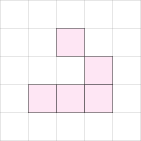

In [16]:
%%itikz --file-prefix implicit-demo- --template pic --keep-file tmp/implicit-demo
\draw[help lines] grid (5, 5);
\draw[fill=magenta!10] (1, 1) rectangle (2, 2);
\draw[fill=magenta!10] (2, 1) rectangle (3, 2);
\draw[fill=magenta!10] (3, 1) rectangle (4, 2);
\draw[fill=magenta!10] (3, 2) rectangle (4, 3);
\draw[fill=magenta!10] (2, 3) rectangle (3, 4);

Note that the resulting `tex` artifact is a full document so you can use it later when writing a `tex` document.

In [17]:
!cat implicit-demo-*.tex

cat: 'implicit-demo-*.tex': No such file or directory


In [18]:
!rm implicit-demo*

rm: cannot remove 'implicit-demo*': No such file or directory


In an `--implicit-pic`, it's often useful to:

- Set the `\tikzpicture[scale=X]` via `--scale=<X>` while iterating.
- Set the `\usepackage{X,Y,Z}` via `--tex-packages=<X,Y,Z>`
- Set the `\usetizlibrary{X,Y,Z}` via `--tiz-libraries=<X,Y,Z>`

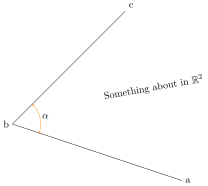

In [19]:
%%itikz --temp-dir --template pic --tikz-libraries=quotes,angles --tex-packages=amsfonts --scale=2
% Example from Paul Gaborit
% http://www.texample.net/tikz/examples/angles-quotes/
\draw
    (3,-1) coordinate (a) node[right] {a}
    -- (0,0) coordinate (b) node[left] {b}
    -- (2,2) coordinate (c) node[above right] {c}
    pic["$\alpha$", draw=orange, <->, angle eccentricity=1.2, angle radius=1cm]
    {angle=a--b--c};
    
\node[rotate=10] (r) at (2.5, 0.65) {Something about in $\mathbb{R}^2$};

Sometimes, tikz-based packages don't use `tikzpicture` environments. To save a few keystrokes, you may want to use an implicit standalone flag. *Note: You have to use `--tex-packages=tikz` in this environment if you need tikz itself!*

In [20]:
%%itikz --temp-dir --template standalone --tex-packages=smartdiagram,amsfonts
\smartdiagramset{uniform sequence color=true,
sequence item border color=black,
sequence item font size=\footnotesize,
sequence item text color=white
}
\smartdiagram[sequence diagram]{
    $\mathbb{N}$,
    $\mathbb{Z}$,
    $\mathbb{Q}$,
    $\mathbb{R}$,
    $\mathbb{I}$,
    $\mathbb{C}$
}

To help ensure that your tikz pictures stay aligned with your data -- and, to reduce the need for properly knowing PGF -- you can use [jinja2 templates](http://jinja.pocoo.org/docs/latest/templates/)! For example, lets say you had five noes in a DAG, ${A,B,C,D,F}$. You could figure out positioning and such in the notebook, where your brain lives.

In [21]:
node_names = "ABCDEF"
nodes = {s: int(365/len(node_names) * i) for i, s in enumerate(node_names)}
n = len(nodes)
nodes

{'A': 0, 'B': 60, 'C': 121, 'D': 182, 'E': 243, 'F': 304}

Then, you can interpret the cell magic source as a jinja2 template.

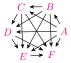

In [22]:
%%itikz --as-jinja --temp-dir
\documentclass[tikz]{standalone}
\usetikzlibrary{arrows,automata}
\definecolor{mymagenta}{RGB}{226,0,116}
\begin{document}
\begin{tikzpicture}[->,>=stealth',shorten >=1pt,auto,node distance=2.8cm,
                    semithick]
  \tikzstyle{every state}=[fill=mymagenta,draw=none,text=white]
  
  {% for name, angle in nodes.items() -%}
       \node[color=mymagenta] (v{{loop.index0}}) at ({{angle}}:1) {${{name}}$};
  {% endfor -%}
  
  {% for n1 in range(n) -%}
      {% for n2 in range(n) -%}
         {%if n1 < n2 -%}
             \path (v{{n1}}) edge (v{{n2}});
         {% endif -%}
      {% endfor -%}
  {% endfor -%}

\end{tikzpicture}

\end{document}

Which also works with the implicit environments.

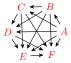

In [23]:
%%itikz --as-jinja --temp-dir --tex-packages=tikz --tikz-libraries=arrows,automata --template standalone
\begin{tikzpicture}[->,>=stealth',shorten >=1pt,auto,node distance=2.8cm,
                    semithick]
  \tikzstyle{every state}=[fill=mymagenta,draw=none,text=white]
  
  {% for name, angle in nodes.items() -%}
       \node[color=red] (v{{loop.index0}}) at ({{angle}}:1) {${{name}}$};
  {% endfor -%}
  
  {% for n1 in range(n) -%}
      {% for n2 in range(n) -%}
         {%if n1 < n2 -%}
             \path (v{{n1}}) edge (v{{n2}});
         {% endif -%}
      {% endfor -%}
  {% endfor -%}

\end{tikzpicture}

Sometimes, you'll make mistakes. Debugging transpiled code is hard, especially without a mapping. To help, you can print the interpolated source.

In [24]:
%%itikz --as-jinja --print-jinja --temp-dir --as-jinja --tex-packages=tikz --tikz-libraries=arrows,automata --template standalone
\begin{tikzpicture}[->,>=stealth',shorten >=1pt,auto,node distance=2.8cm,
                    semithick]
  \tikzstyle{every state}=[fill=mymagenta,draw=none,text=white]
  
  {% for name, angle in nodes.items() -%}
       \node[color=red] (v{{loop.index0}}) at ({{angle}}:1) {${{name}}$};
  {% endfor -%}
  
  {% for n1 in range(n) -%}
      {% for n2 in range(n) -%}
         {%if n1 < n2 -%}
             \path (v{{n1}}) edge (v{{n2}});
         {% endif -%}
      {% endfor -%}
  {% endfor %}

\end{tikzpicture}

\begin{tikzpicture}[->,>=stealth',shorten >=1pt,auto,node distance=2.8cm,
                    semithick]
  \tikzstyle{every state}=[fill=mymagenta,draw=none,text=white]
  
  \node[color=red] (v0) at (0:1) {$A$};
  \node[color=red] (v1) at (60:1) {$B$};
  \node[color=red] (v2) at (121:1) {$C$};
  \node[color=red] (v3) at (182:1) {$D$};
  \node[color=red] (v4) at (243:1) {$E$};
  \node[color=red] (v5) at (304:1) {$F$};
  \path (v0) edge (v1);
         \path (v0) edge (v2);
         \path (v0) edge (v3);
         \path (v0) edge (v4);
         \path (v0) edge (v5);
         \path (v1) edge (v2);
         \path (v1) edge (v3);
         \path (v1) edge (v4);
         \path (v1) edge (v5);
         \path (v2) edge (v3);
         \path (v2) edge (v4);
         \path (v2) edge (v5);
         \path (v3) edge (v4);
         \path (v3) edge (v5);
         \path (v4) edge (v5);
         

\end{tikzpicture}


Finally, its worth noting that jinja templating assumes a jinja2 file loader set in the `$CWD`. This means you can stick to the DRY principal with blocks and template extension.

In [25]:
%%writefile dag_demo.tex
\documentclass[tikz]{standalone}
\usetikzlibrary{arrows,automata}
\definecolor{mymagenta}{RGB}{226,0,116}
\begin{document}
\begin{tikzpicture}[->,>=stealth',shorten >=1pt,auto,node distance=2.8cm,
                    semithick]
  \tikzstyle{every state}=[fill=mymagenta,draw=none,text=white]
  
{% block content %}
{% endblock %}

\end{tikzpicture}
\end{document}

Writing dag_demo.tex


In [26]:
!ls dag_demo.tex

dag_demo.tex


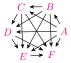

In [27]:
%%itikz --as-jinja --temp-dir
{% extends "dag_demo.tex" %}
{% block content %}

{% for name, angle in nodes.items() %}
       \node[color=mymagenta] (v{{loop.index0}}) at ({{angle}}:1) {${{name}}$};
{% endfor -%}
  
{% for n1 in range(n) %}
    {% for n2 in range(n) %}
        {%if n1 < n2 %}
            \path (v{{n1}}) edge (v{{n2}});
        {% endif %}
    {% endfor -%}
{% endfor %}

{% endblock %}

In [28]:
!rm dag_demo.tex # ignore this, it's just housekeeping

rm: cannot remove '#': No such file or directory
rm: cannot remove 'ignore': No such file or directory
rm: cannot remove 'this,': No such file or directory
rm: cannot remove 'its just housekeeping': No such file or directory


Sometimes, you may want to send a collaborator a quick snapshot of your work. But, lots of messaging windows won't accept SVG drag-and-drop. As a time saver, you can rasterize the SVG as a PNG (if you have cairosvg installed).

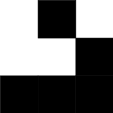

In [29]:
%%itikz --template pic --temp-dir --rasterize
\draw[fill=black] (1, 1) rectangle (2, 2);
\draw[fill=black] (2, 1) rectangle (3, 2);
\draw[fill=black] (3, 1) rectangle (4, 2);
\draw[fill=black] (3, 2) rectangle (4, 3);
\draw[fill=black] (2, 3) rectangle (3, 4);

Also, the latex command line error messages tend to be...verbose. By default, only the tail is shown.

In [30]:
%%itikz --template pic
4$

Rc files read:
  NONE
Latexmk: Nothing to do for 'C:/Users/jeff/AppData/Local/Temp/itikz/7ac27ed81bdd7ffacd231919e6450552.tex'.
Collected error summary (may duplicate other messages):
  pdflatex: gave an error in previous invocation of latexmk.



TypeError: cannot unpack non-iterable NoneType object

But, if this isn't enough, you can see the whole message.

In [ ]:
%%itikz --implicit-pic --full-error
4$

Finally, if you forget the usage, ask for help.

In [ ]:
%itikz -h